https://colab.research.google.com/drive/1mKuJXoANsyCy1Fs45GB3JN0Rlnn6kwLd?usp=sharing

Github Repository

In [ ]:
%cd https://github.com/zoya4477/Data-Science.git
!git clone
!git config--global user.email "zoyahafeez785@gmail.com"
!git config--global user.name "zoya4477"

[Errno 2] No such file or directory: 'https://github.com/zoya4477/Data-Science.git'
/content
fatal: You must specify a repository to clone.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                

**Project :- 1**

 Exploratory Data Analysis (EDA)

Load and Inspect Data

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/titanic.csv")

# First look at the data
print(df.head())
print(df.info())
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [ ]:
# Move 'Survived' column to the end
survived = df['Survived']
df = df.drop(columns=['Survived'])
df['Survived'] = survived

print(df.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  


Data Cleaning

In [ ]:
# Check missing values
print(df.isnull().sum())

# Fill missing Age with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)


PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64


/tmp/ipython-input-3258793014.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-3258793014.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Basic statistics analysis

In [ ]:
#Summary statistics
print(df.describe(include='all'))

        PassengerId      Pclass                 Name   Sex         Age  \
count    891.000000  891.000000                  891   891  891.000000   
unique          NaN         NaN                  891     2         NaN   
top             NaN         NaN  Dooley, Mr. Patrick  male         NaN   
freq            NaN         NaN                    1   577         NaN   
mean     446.000000    2.308642                  NaN   NaN   29.699118   
std      257.353842    0.836071                  NaN   NaN   13.002015   
min        1.000000    1.000000                  NaN   NaN    0.420000   
25%      223.500000    2.000000                  NaN   NaN   22.000000   
50%      446.000000    3.000000                  NaN   NaN   29.699118   
75%      668.500000    3.000000                  NaN   NaN   35.000000   
max      891.000000    3.000000                  NaN   NaN   80.000000   

             SibSp       Parch  Ticket        Fare Embarked    Survived  
count   891.000000  891.000000     89

In [ ]:
#Grouping
print(df.groupby('Survived')['Age'].mean())
print(df.groupby('Pclass')['Fare'].mean())


Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


Data Visualization

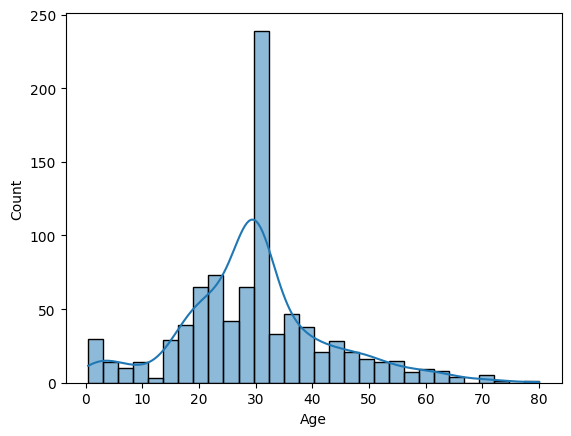

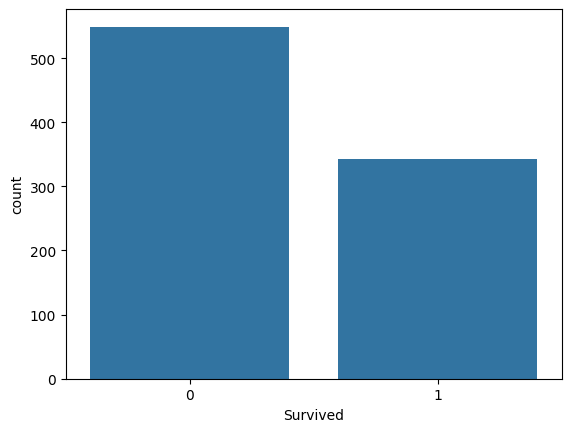

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age
sns.histplot(df['Age'], bins=30, kde=True)
plt.show()

# Count of Survivors
sns.countplot(x='Survived', data=df)
plt.show()

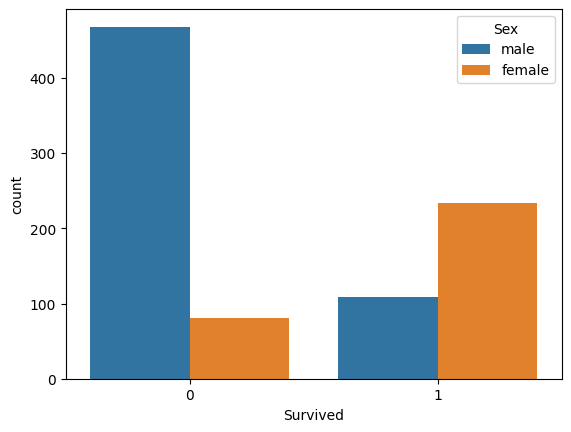

In [ ]:
# Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()




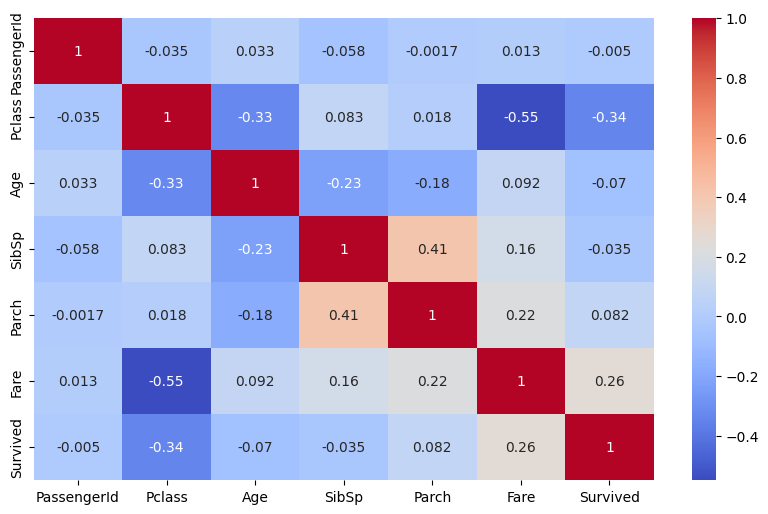

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.show()

**Project :- 2**

 Simple Linear Regression on Housing Prices

Load Data

In [4]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load Boston Housing dataset from OpenML
boston = fetch_openml(name="boston", version=1, as_frame=True)

# DataFrame
df = boston.frame
print(df.head())
print(df.info())


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    

Data Preprocessing

In [5]:
#null values
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Feature Selection

In [ ]:
X = df[['RM']]   # independent variable (avg number of rooms)
y = df['MEDV']   # dependent variable (house price)


Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Coefficient (Slope): 6.561783228006269
Intercept: 22.504337584466665
R² Score: 0.3707569232254778
RMSE: 6.792994578778734


Visualization

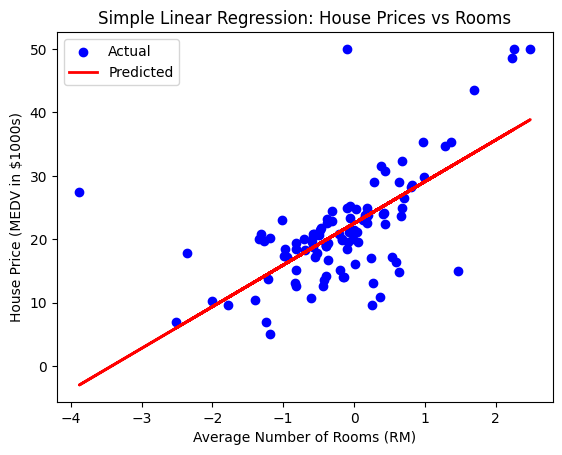

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("House Price (MEDV in $1000s)")
plt.title("Simple Linear Regression: House Prices vs Rooms")
plt.legend()
plt.show()


**Project :- 3**

 Loan Eligibility Prediction

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Load Data

In [ ]:
zip_file_path = '/content/Loan eligible.zip'
extract_dir = '/content/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Now load the desired CSV file
df = pd.read_csv(os.path.join(extract_dir, 'loan-train.csv'))
display(df.head())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Explore Structure & Target

In [ ]:
print("Shape:", df.shape)
print("\nDTypes:\n", df.dtypes)
print("\nTarget distribution:\n", df['Loan_Status'].value_counts(dropna=False))

# Basic summaries
display(df.describe(include='number').T)
display(df.describe(include='object').T)

# Missing values
df.isnull().sum().sort_values(ascending=False)


Shape: (614, 13)

DTypes:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Target distribution:
 Loan_Status
Y    422
N    192
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


,count,unique,top,freq
Loan_ID,614,614,LP002990,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Education,0
Loan_ID,0
CoapplicantIncome,0


Visual check

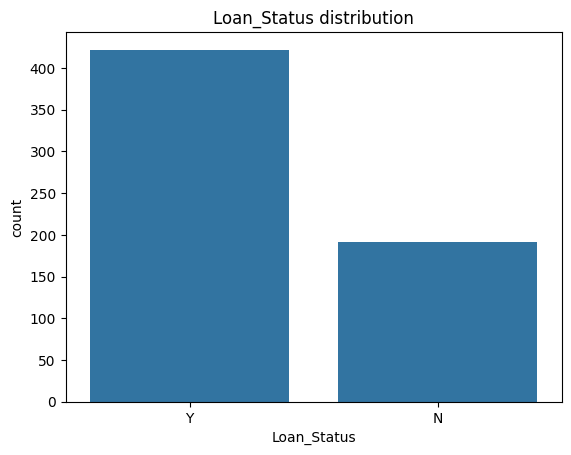

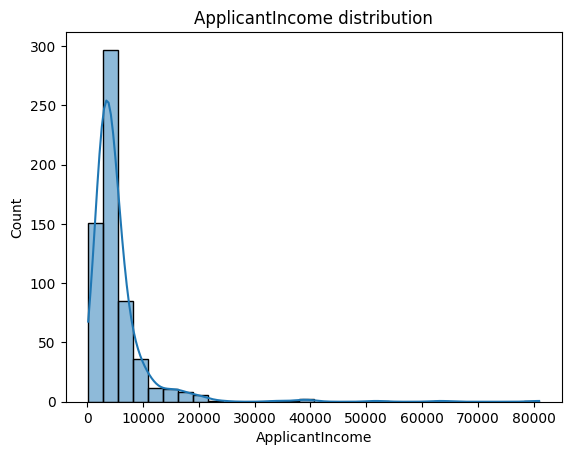

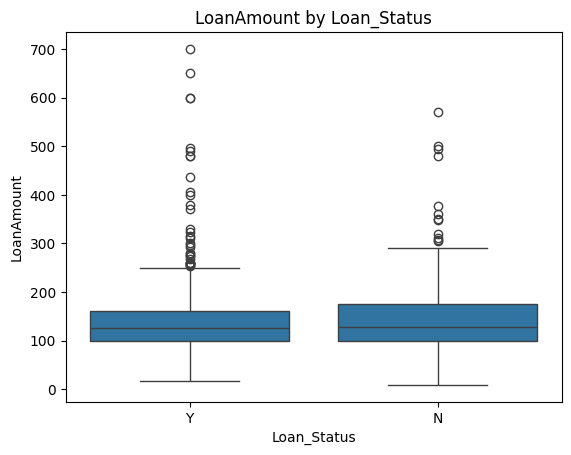

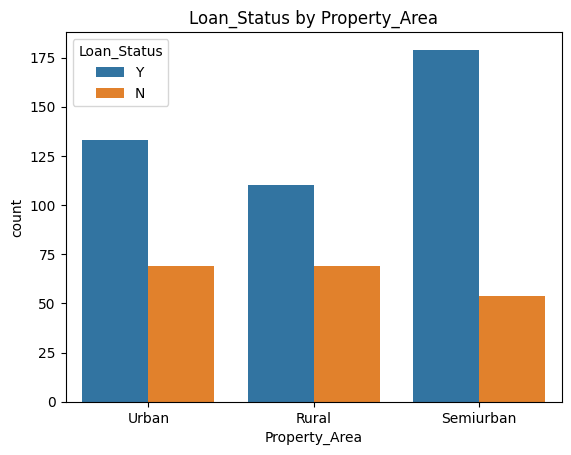

In [ ]:
# Class balance
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan_Status distribution")
plt.show()

# Income distributions
fig, ax = plt.subplots()
sns.histplot(df['ApplicantIncome'], bins=30, kde=True, ax=ax)
ax.set_title("ApplicantIncome distribution")
plt.show()

# LoanAmount vs Status
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title("LoanAmount by Loan_Status")
plt.show()

# Categorical relationship example
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title("Loan_Status by Property_Area")
plt.show()


Target Encoding & Feature/Target Split

In [ ]:
df = df.copy()
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

X = df.drop(columns=['Loan_ID','Loan_Status'])
y = df['Loan_Status']


In [ ]:
#define column types
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

cat_cols, num_cols


(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area'],
 ['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'])

Preprocessing Pipelines (Impute + Encode/Scale)

In [ ]:
# Categorical: impute most_frequent, then OneHot
cat_pre = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

# Numeric: impute median, then scale
num_pre = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pre, cat_cols),
        ('num', num_pre, num_cols)
    ]
)


Train/Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Logistic Regresssion

In [ ]:
logreg_clf = Pipeline(steps=[
    ('prep', preprocessor),
    ('model', LogisticRegression(max_iter=2000))
])

logreg_clf.fit(X_train, y_train)
y_pred = logreg_clf.predict(X_test)
y_proba = logreg_clf.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8617886178861789
Precision: 0.84
Recall: 0.9882352941176471
F1: 0.9081081081081082
ROC-AUC: 0.8523219814241486

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



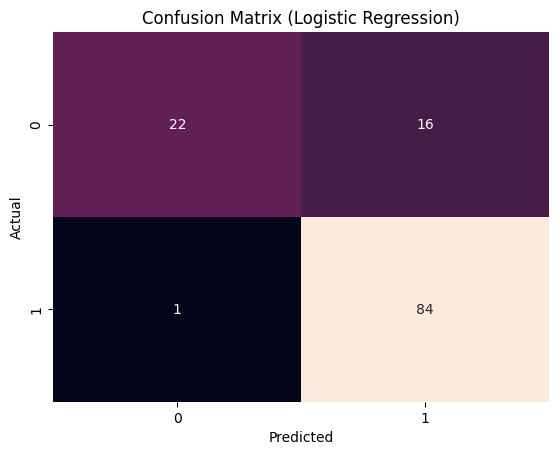

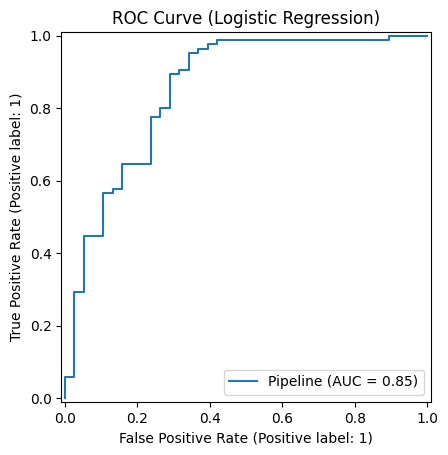

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cbar=False)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

RocCurveDisplay.from_estimator(logreg_clf, X_test, y_test)
plt.title("ROC Curve (Logistic Regression)")
plt.show()


Try Multiple Algorithms

In [ ]:
models = {
    "LogReg": LogisticRegression(max_iter=2000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42)
}

for name, base in models.items():
    pipe = Pipeline([('prep', preprocessor), ('model', base)])
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipe, X, y, scoring='accuracy', cv=cv)
    print(f"{name}: CV Accuracy = {scores.mean():.3f} ± {scores.std():.3f}")


LogReg: CV Accuracy = 0.803 ± 0.025
DecisionTree: CV Accuracy = 0.704 ± 0.027
RandomForest: CV Accuracy = 0.767 ± 0.022
